
1. Download Dataset

The Dataset is Churn_Modelling.csv 
> 

>





In [1]:
import numpy as np

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

2. Load the Dataset

In [4]:
df = pd.read_csv("Churn_Modelling.csv")
df

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0          2       0.00              1          1               1   
1          1   83807.86              1          0               1   
2          8  159660.80              3          1               0   
3          1       0.00              2          0               0   
4          2  125510.82              1          1               1   
...      ...        ...            ...        ...             ...   
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
0           101348.88       1  
1           112542.58       0  
2           113931.57       1  
3            93826.63       0  
4            79084.10       0  
...               ...     ...  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0  

[10000 rows x 14 columns]

3. (1) Univariate Analysis

[Text(0.5, 1.0, 'Age Distribution')]

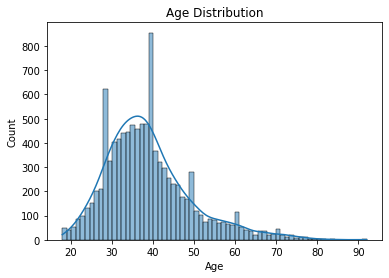

In [5]:
sns.histplot(df.Age, kde = True).set(title = 'Age Distribution')

[Text(0.5, 1.0, 'CreditScore Distribution')]

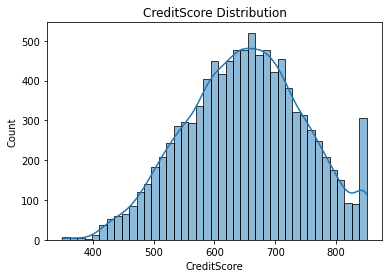

In [6]:
sns.histplot(df.CreditScore, kde = True).set(title = 'CreditScore Distribution')

3.(2) Bi - variate Analysis 

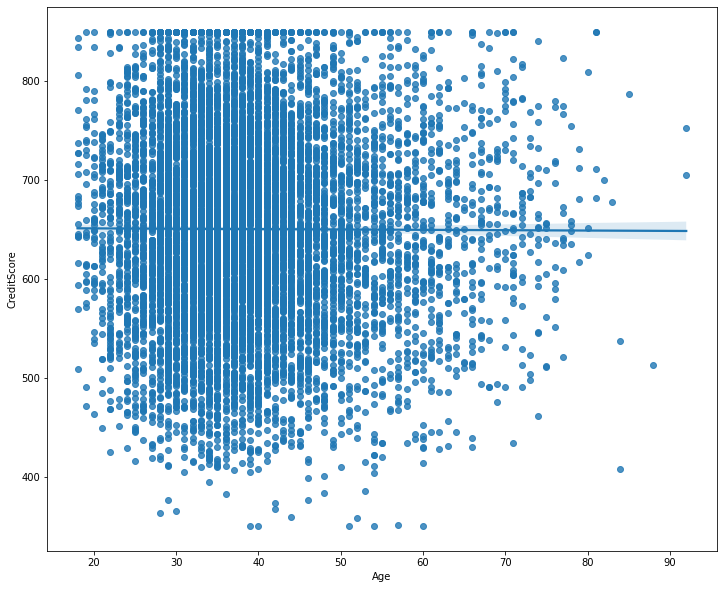

In [8]:
plt.figure(figsize=(12,10))
sns.regplot(x="Age", y="CreditScore", data=df)

3.(3) Multi - Variate Analysis

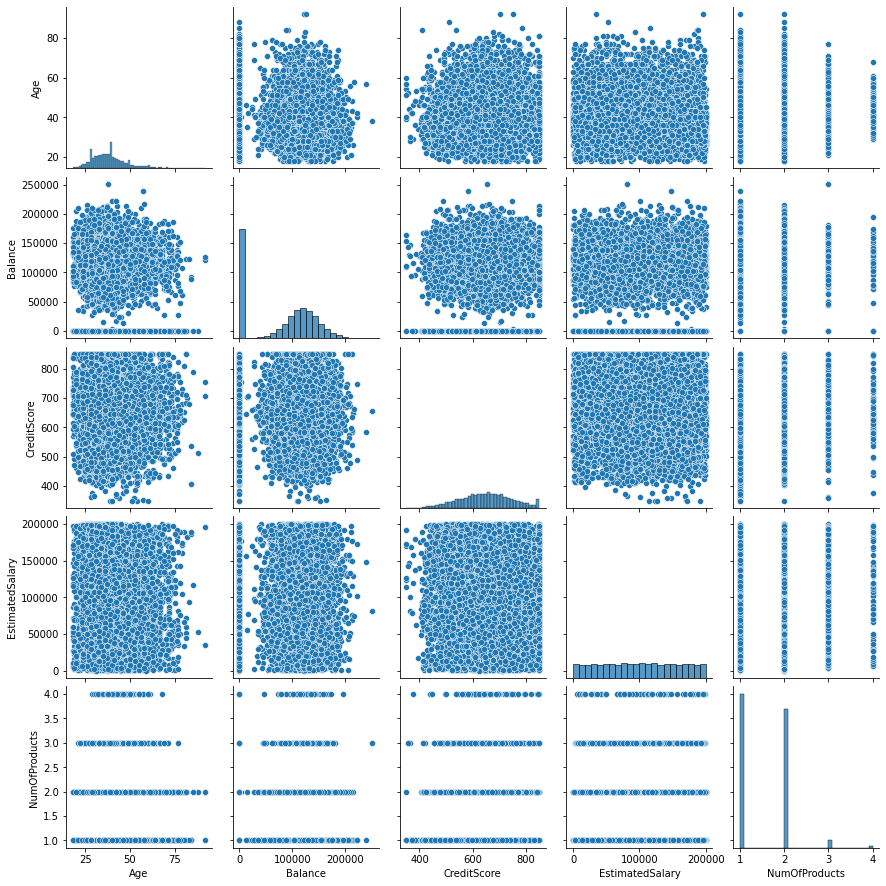

In [9]:
sns.pairplot(data=df[['Age', 'Balance', 'CreditScore', 'EstimatedSalary', 'NumOfProducts']])


4.Perform descriptive statistics on the dataset.

In [10]:
df.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited  
count     10000.000000  10000.000000  
mean     100090.239881      0.203700  
std       57510.492818      0.402769  
min          11.580000      0.000000  
25%       51002.110000      0.000000  
50%      100193.915000      0.000000  
75%      149388.247500      0.000000  
max      199992.480000      1.000000

5.Handle the Missing values.


In [11]:
missing_data=df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

RowNumber
False    10000
Name: RowNumber, dtype: int64

CustomerId
False    10000
Name: CustomerId, dtype: int64

Surname
False    10000
Name: Surname, dtype: int64

CreditScore
False    10000
Name: CreditScore, dtype: int64

Geography
False    10000
Name: Geography, dtype: int64

Gender
False    10000
Name: Gender, dtype: int64

Age
False    10000
Name: Age, dtype: int64

Tenure
False    10000
Name: Tenure, dtype: int64

Balance
False    10000
Name: Balance, dtype: int64

NumOfProducts
False    10000
Name: NumOfProducts, dtype: int64

HasCrCard
False    10000
Name: HasCrCard, dtype: int64

IsActiveMember
False    10000
Name: IsActiveMember, dtype: int64

EstimatedSalary
False    10000
Name: EstimatedSalary, dtype: int64

Exited
False    10000
Name: Exited, dtype: int64



6.Find the outliers and replace the outliers


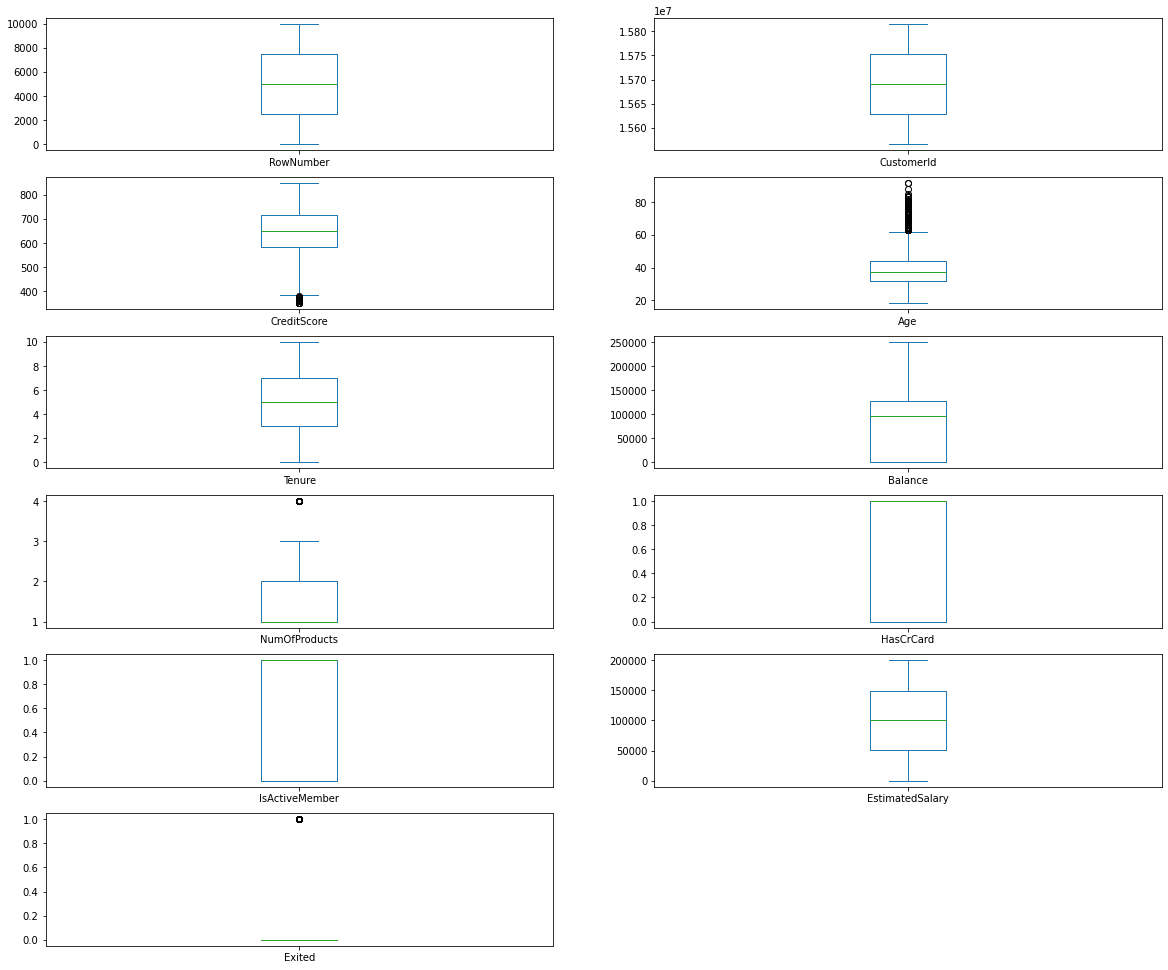

In [16]:
df.plot(kind="box",subplots=True,layout=(7,2),figsize=(20,20));

7.Check for Categorical columns and perform encoding.

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [20]:
df['Gender'] = le.fit_transform(df['Gender'])
df['Geography'] = le.fit_transform(df['Geography'])

In [22]:
df.tail()

RowNumber  CustomerId    Surname  CreditScore  Geography  Gender  Age  \
9995       9996    15606229   Obijiaku          771          0       1   39   
9996       9997    15569892  Johnstone          516          0       1   35   
9997       9998    15584532        Liu          709          0       0   36   
9998       9999    15682355  Sabbatini          772          1       1   42   
9999      10000    15628319     Walker          792          0       0   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0

8.Split the data into dependent and independent variables.

In [23]:
independent_variables = df[['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']].values
independent_variables

array([[6.1900000e+02, 0.0000000e+00, 0.0000000e+00, ..., 2.0000000e+00,
        0.0000000e+00, 1.0134888e+05],
       [6.0800000e+02, 2.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        8.3807860e+04, 1.1254258e+05],
       [5.0200000e+02, 0.0000000e+00, 0.0000000e+00, ..., 8.0000000e+00,
        1.5966080e+05, 1.1393157e+05],
       ...,
       [7.0900000e+02, 0.0000000e+00, 0.0000000e+00, ..., 7.0000000e+00,
        0.0000000e+00, 4.2085580e+04],
       [7.7200000e+02, 1.0000000e+00, 1.0000000e+00, ..., 3.0000000e+00,
        7.5075310e+04, 9.2888520e+04],
       [7.9200000e+02, 0.0000000e+00, 0.0000000e+00, ..., 4.0000000e+00,
        1.3014279e+05, 3.8190780e+04]])

In [24]:
dependent_variable = df[['Exited']].values
dependent_variable

array([[1],
       [0],
       [1],
       ...,
       [1],
       [1],
       [0]])

9. Scale the independent variables

In [43]:
from sklearn.preprocessing import StandardScaler
se = StandardScaler()

In [44]:
dependent_variable['CreditScore'] = se.fit_transform(pd.DataFrame(dependent_variable['CreditScore']))
dependent_variable['Age'] = se.fit_transform(pd.DataFrame(dependent_variable['Age']))
dependent_variable['Balance'] = se.fit_transform(pd.DataFrame(dependent_variable['Balance']))
dependent_variable['EstimatedSalary'] = se.fit_transform(pd.DataFrame(dependent_variable['EstimatedSalary']))

IndexError: ignored

10. Split the data into training and testing

In [35]:
from sklearn.model_selection import train_test_split


In [37]:
training_data,testing_data = train_test_split(df, test_size = 0.2, random_state = 20) 

In [38]:
print(training_data.shape)
print(testing_data.shape)

(8000, 14)
(2000, 14)
